<a href="https://colab.research.google.com/github/RiverGumSecurity/AILabs/blob/main/016_Fundamentals/Linear_Regression.ipynb" target="_new"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Linear regression is a fundamental statistical and machine learning technique used to model the relationship between one or more independent variables and a continuous dependent variable. In other words, it is a predictive modeling technique used to understand the relationship between two variables, where one variable's value is predicted based on the real-time input of the other.

It does so by fitting a line (or hyperplane in multiple dimensions) that minimizes the error between predicted and actual values. It is useful to predict future values for similar datasets.

The goal of linear regression is to find coefficients for the model that minimize the MSE, ensuring the model predicts as closely as possible to observed data. By focusing on MSE, linear regression emphasizes both accuracy and sensitivity to outliers in predictions, making it a widely used method for forecasting and data analysis tasks.

The overall process conists of:

1. Loading the dataset
2. Creating feature and target values out of the data
3. Splitting data into training and validation sets
4. Training a linear regression model
5. Making predictions
6. Evaluating the model
7. Predicting new data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Loading the Dataset

The California Housing Sataset is a well-known dataset in the field of machine learning and statistics, commonly used for regression tasks. It contains data on housing in California from the 1990 U.S. Census. The dataset's goal is to predict the median house value of districts based on various features, providing a real-world scenario for regression modeling. It is included with scikit-learn.

The dataset consists of 20,640 observations (districts) and 8 features:

1. **Median Income**: Median income of households in the district, scaled to a roughly normalized range (e.g., 2–15).
2. **House Age**: Median age of houses in the district.
3. **Average Rooms**: Average number of rooms per household.
4. **Average Bedrooms**: Average number of bedrooms per household.
5. **Population**: Total population of the district.
6. **Households**: Total number of households in the district.
7. **Latitude**: Geographical coordinate (north-south location of the district).
8. **Longitude**: Geographical coordinate (east-west location of the district).

The target variable is **Median House Value**, which is capped at $500,000 in the dataset, creating a slight limitation due to this ceiling effect. The dataset is useful for exploring relationships between socio-economic and geographical factors and housing prices, and it is often used as a benchmark for regression algorithms in machine learning tasks.

In [2]:
## Load the California housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

In [3]:
## Display the first few rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Separate Features and Target

We will split the dataset into training and testing subsets for machine learning, using the `train_test_split` function from **scikit-learn**. 

   - `X = df.drop('MedHouseVal', axis=1)`: This creates a DataFrame `X` containing all columns except the target variable (`MedHouseVal`), which is the median house value in this context. The `drop` function removes the target column from the feature set.
   - `y = df['MedHouseVal']`: This creates a Series `y` that contains only the target variable (`MedHouseVal`), which we aim to predict.


In [4]:
## Split the data into training and testing sets
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']


## Split the Dataset
We split the data into testing and vaildation sets, so that we train on one set and validate and score on the other set

   - `train_test_split(X, y, test_size=0.2, random_state=42)`: This splits the data into training and testing subsets:
     - **`X_train` and `X_test`**: These contain the training and testing splits of the features (`X`).
     - **`y_train` and `y_test`**: These contain the corresponding target values for the training and testing sets (`y`).
     - `test_size=0.2`: Specifies that 20% of the data will be allocated to the testing set, and the remaining 80% will be used for training.
     - `random_state=42`: Sets a seed for random number generation to ensure reproducibility of the split, meaning the same split will occur every time the code runs.

The resulting datasets (`X_train`, `X_test`, `y_train`, `y_test`) can now be used for training and evaluating a machine learning model.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create Linear Regression Model

Creating the model involves two main steps:

**Model Initialization**

```
model = LinearRegression()
```

- **What it does**: This line creates an instance of the `LinearRegression` class, which is part of the `sklearn` library.
- **Purpose**: The `LinearRegression` model is used to find the best-fit line (or hyperplane in higher dimensions) for the given data. It assumes a linear relationship between the input features (`X`) and the target variable (`y`).
- **Behind the scenes**: The model will later calculate coefficients (weights) for each feature and an intercept to minimize the difference (error) between the actual and predicted values.

The mathematical representation of linear regression is:

$$ y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b $$

where:
- $y$ is the target (predicted output),
- $x_1, x_2, dots, x_n$ are the input features,
- $w_1, w_2, dots, w_n$ are the coefficients (weights) for each feature,
- $b$ is the intercept (bias term).

---

**Model Training**
```python
model.fit(X_train, y_train)
```

- **What it does**: The `.fit()` method trains the linear regression model using the training dataset (`X_train` and `y_train`).
  - `X_train`: The input features (e.g., TF-IDF vectors of email text) for training.
  - `y_train`: The target values (e.g., binary labels indicating whether an email is phishing or legitimate).

- **Purpose**: The model learns the optimal values for the coefficients (\(w_1, w_2, \dots, w_n\)) and the intercept (\(b\)) that minimize the error between predicted values and actual target values.

- **Error Minimization**: The training process minimizes the **Mean Squared Error (MSE)**:

$$
MSE = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - \hat{y}_i \right)^2
$$

where:
- $N$ is the number of samples,
- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value.

---

**Outcome**

After `model.fit()` is called:
- The model has learned the relationship between the input features (`X_train`) and the target values (`y_train`).
- It can now be used to predict target values for unseen data using `model.predict(X_test)` or similar.

In summary, this snippet initializes a linear regression model and trains it on the training data to learn a linear relationship between input features and target values.

In [6]:
## Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Making Predictions on the data

This step applies the trained linear regression model to unseen test data to generate predictions. The unseen data is our validation test set. In practicen these predictions could then be analyzed, compared to actual values, or used for further business decision-making.

In [7]:
## Make predictions on the testing set
y_pred = model.predict(X_test)


## Evaluation of Model Performance

Interpreting **Mean Squared Error (MSE):**

The central metric for evaluating this error is the **Mean Squared Error (MSE)**, which calculates the average of the squared differences between predicted values $(\hat{y})$ and true values $(y)$. Squaring these differences ensures that errors are penalized proportionally to their magnitude, emphasizing large deviations.

The **Mean Squared Error (MSE)** quantifies the average squared difference between predicted values (\(\hat{y}\)) and actual values (\(y\)) in a regression model. Here's how to interpret it:

1. **Scale and Units**:
   - MSE is measured in the square of the units of the target variable. For example, if the target is housing prices in dollars, the MSE is in squared dollars.
   
2. **Lower MSE is Better**:
   - A smaller MSE indicates that the predictions are closer to the actual values, meaning the model performs better.
   
3. **Sensitive to Outliers**:
   - MSE heavily penalizes large errors because the differences are squared. A few large deviations can significantly increase the MSE.

4. **Absolute Meaning**:
   - While MSE is useful for comparing models, its absolute value doesn’t convey how “good” a model is without context. For example, comparing the MSE to the variance of the data can help gauge the model's effectiveness.

---

### Interpreting **\(R^2\) (R-squared)**:

The **R-squared** value, also known as the coefficient of determination, measures the proportion of variance in the dependent variable that is predictable from the independent variables. Its interpretation:

1. **Range**:
   - \(R^2\) ranges from 0 to 1:
     - \(R^2 = 0\): The model explains none of the variance in the target variable (no predictive power).
     - \(R^2 = 1\): The model explains all of the variance in the target variable (perfect predictive power).
   - In rare cases, \(R^2\) can be negative if the model performs worse than simply predicting the mean value of the target.

2. **Higher \(R^2\) is Better**:
   - Higher \(R^2\) values indicate that the model accounts for more of the variability in the target variable. However, a high \(R^2\) doesn’t always mean the model is good—it might be overfitting.

3. **Complementary to MSE**:
   - While MSE gives an absolute error metric, \(R^2\) gives a relative measure of how well the model captures variability compared to a baseline (the mean).

If \(R^2 = 0.85\), it means the model explains 85% of the variance in housing prices, which is usually a sign of a strong model, assuming the data isn’t overfit or has multicollinearity issues.

In [8]:
## Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5558915986952443
R-squared: 0.5757877060324508


We can visualize the relationship between the actual (measured) values and the predicted values from the regression model. Each point in the scatter plot represents a single test data sample.
The x-coordinate is the actual value and y-coordinate is the predicted value. If the model's predictions were perfect, all points would lie on a straight line (the diagonal)

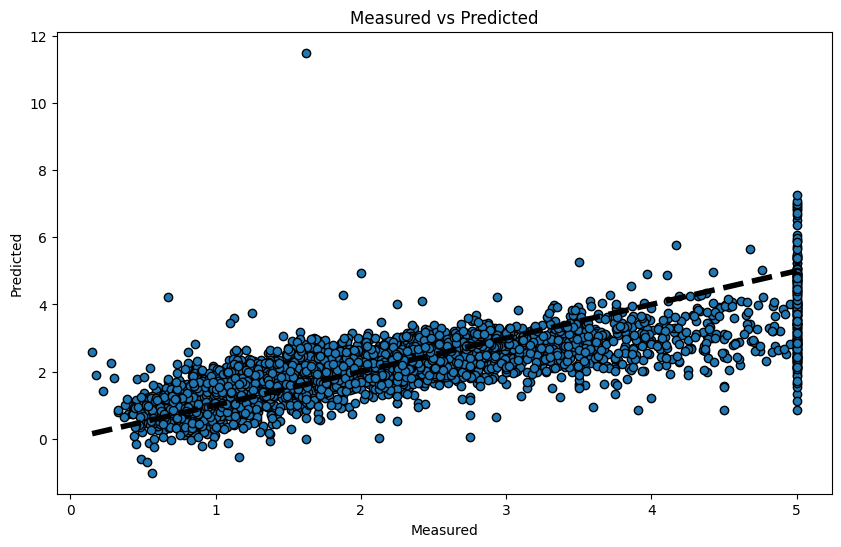

In [10]:
## Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted')
plt.show()

## Predicting New Values

We can use our model to predict median house value when given new data.

In [11]:
new_data = pd.DataFrame({
    'MedInc': [8.5], 'HouseAge': [30], 'AveRooms': [6], 'AveBedrms': [1],
    'Population': [1200], 'AveOccup': [3], 'Latitude': [34.0], 'Longitude': [-118.0]
})

# Predict the median house value
new_prediction = model.predict(new_data)
print(f"Predicted Median House Value: {new_prediction[0]:.2f}")


Predicted Median House Value: 4.02
